In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sympy import *

import scipy
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

In [5]:
A = [[3,0,5], [8,1,3]]

U,S,V = np.linalg.svd(A)

print(U)
print(S)
print(V)

[[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]
[9.89086518 3.18916698]
[[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


In [40]:
# relationship between SVD and EDC for a square matix?

A = np.random.randn(5,5)
A = A @ A.T

L, W = np.linalg.eig(A)

U,s,V = np.linalg.svd(A)

sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]


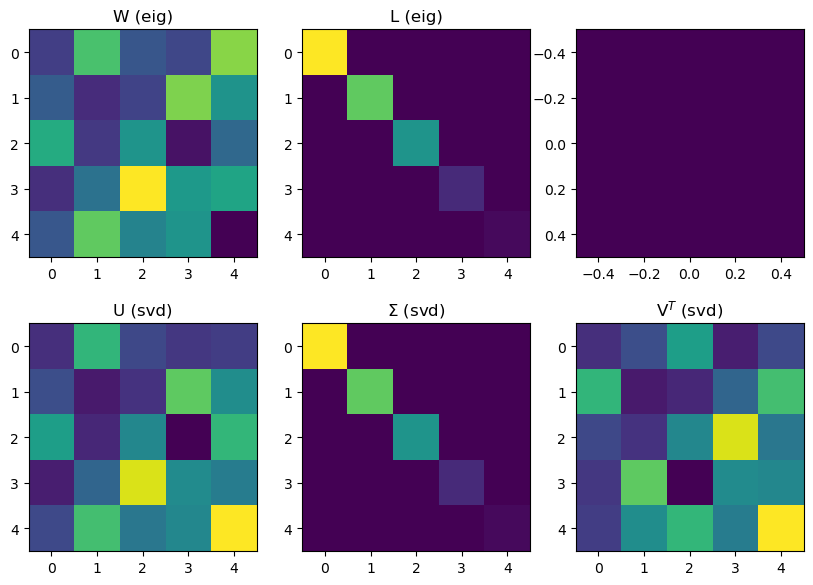

[7.3489161  5.54174568 3.81212349 0.88019424 0.19354024]
[[-0.54078352  0.29109845 -0.40726417 -0.49421766  0.46119375]
 [-0.3731641  -0.63404021 -0.51671642  0.43716237 -0.02519462]
 [ 0.13763431 -0.57255505 -0.01780287 -0.75113128 -0.29786301]
 [-0.62102743 -0.23462983  0.74246553  0.01228154  0.08870099]
 [-0.40457813  0.3610876  -0.12477189 -0.01699831 -0.83070772]]
 
[[-0.54078352  0.29109845 -0.40726417 -0.49421766 -0.46119375]
 [-0.3731641  -0.63404021 -0.51671642  0.43716237  0.02519462]
 [ 0.13763431 -0.57255505 -0.01780287 -0.75113128  0.29786301]
 [-0.62102743 -0.23462983  0.74246553  0.01228154 -0.08870099]
 [-0.40457813  0.3610876  -0.12477189 -0.01699831  0.83070772]]
[7.3489161  5.54174568 3.81212349 0.88019424 0.19354024]
[[-0.54078352 -0.3731641   0.13763431 -0.62102743 -0.40457813]
 [ 0.29109845 -0.63404021 -0.57255505 -0.23462983  0.3610876 ]
 [-0.40726417 -0.51671642 -0.01780287  0.74246553 -0.12477189]
 [-0.49421766  0.43716237 -0.75113128  0.01228154 -0.01699831]


In [41]:
fix, ax = plt.subplots(2,3, figsize = (10,7))

ax[0,0].imshow(W)
ax[0,0].set_title("W (eig)")
ax[0,1].imshow(np.diag(L))
ax[0,1].set_title("L (eig)")
ax[0,2].imshow(np.zeros((1,1)))

ax[1,0].imshow(U)
ax[1,0].set_title("U (svd)")
ax[1,1].imshow(np.diag(s))
ax[1,1].set_title("$\Sigma$ (svd)")
ax[1,2].imshow(V)
ax[1,2].set_title("V$^T$ (svd)")

plt.show()



print(L)
print(W)

print(" ")

print(U)
print(s)
print(V)


In [42]:
# Compare U and V
np.round(U-V.T,4)

array([[-0.,  0., -0.,  0.,  0.],
       [ 0.,  0., -0., -0., -0.],
       [-0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0., -0., -0.],
       [-0.,  0., -0., -0.,  0.]])

In [46]:
# compare U and W
np.round(U - W,4 )

array([[ 0.    ,  0.    , -0.    , -0.    , -0.9224],
       [-0.    ,  0.    , -0.    , -0.    ,  0.0504],
       [ 0.    ,  0.    , -0.    ,  0.    ,  0.5957],
       [-0.    , -0.    , -0.    , -0.    , -0.1774],
       [-0.    ,  0.    ,  0.    ,  0.    ,  1.6614]])

# VIDEO: Relation between singular values and eigenvalues

In [53]:
# case 1: eig(A'A) vs. svd(A)

A = np.array([ [3,1,0], [1,1,0] ])

print( np.sort(np.linalg.eig(A.T@A)[0]) )
print(A.T@A)
print( np.sort(np.linalg.svd(A)[1])**2 )

[ 0.          0.34314575 11.65685425]
[[10  4  0]
 [ 4  2  0]
 [ 0  0  0]]
[ 0.34314575 11.65685425]


In [49]:
# case 2: eig(A'A) vs. svd(A'A)

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [50]:
# case 3a: eig(A) vs. svd(A), real-valued eigs

# need a square matrix for eig
A = [ [3,1,0], [1,1,0], [1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))s

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [61]:
# case 3b: eig(A) vs. svd(A), complex eigs

# random matrices are likely to give complex eigenvalues
A = np.random.randn(3,3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[-0.56925339-1.0517846j -0.56925339+1.0517846j  0.59380473+0.j       ]
[0.42226617 1.02318899 1.965752  ]


In [9]:
# U from eigendecomposition of A^TA
A = np.random.rand(3,6)
Us, Ss, Vs = np.linalg.svd(A)
A1 = A.T @ A
L, V = np.linalg.eig(A1)

sidx = np.argsort(L)[::-1]
print(sidx)
L = L[sidx]
V = V[:,sidx]

[0 2 1 4 5 3]


In [19]:
print(np.round(Vs.T - V, 2))

[[-1.02  0.   -0.92 -0.15 -0.69 -0.5 ]
 [-0.37  0.   -0.7  -0.31  0.34  0.86]
 [-0.81 -0.    0.49  0.03 -0.31 -0.65]
 [-0.86 -0.    0.79  0.94  0.72 -0.13]
 [-1.06  0.   -0.53 -0.05  0.44  0.45]
 [-0.56 -0.    1.23 -0.92 -0.47  0.64]]


In [20]:
print(L), print(" ")
print(Ss**2)

[ 5.03713499e+00  4.56696442e-01  3.36194039e-01 -8.82429428e-18
 -1.14325187e-16 -7.12341826e-16]
 
[5.03713499 0.45669644 0.33619404]


In [25]:
U = np.zeros((3,3))
for i in range(3):
    U[:,i] = A@V[:,i].T/np.sqrt(L[i])

print(np.round(U-Us,2))

[[ 0.77 -0.    0.59]
 [ 0.85 -0.    1.57]
 [ 1.64  0.   -1.09]]


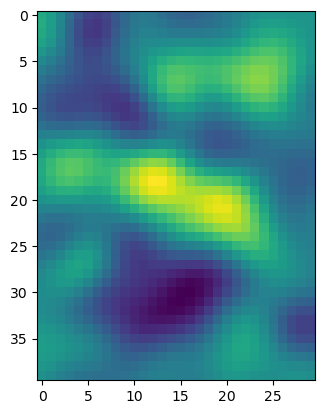

In [2]:
# Spectral theory of matrices
m = 40
n = 30

k = int( (m + n)/ 4)
xx = np.linspace(-3, 3, k)
[X,Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X **2 + Y ** 2) / (k/8))

A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, "same")

plt.imshow(A)
plt.show()



/var/folders/lv/t_x0qxn13y374h66r__crswh0000gn/T/ipykernel_6637/3168511720.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241)


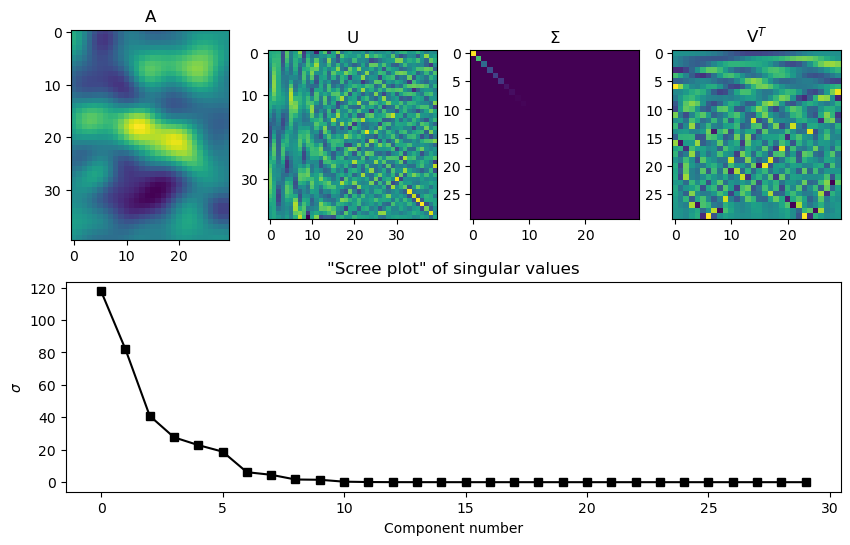

In [4]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

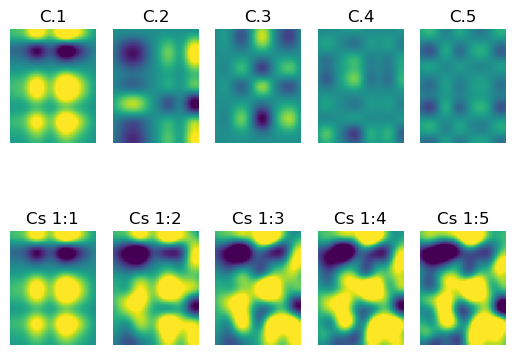

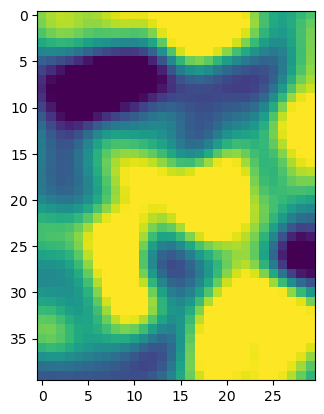

In [19]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,s:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()

In [43]:
# low rank approximation

nComps = 5

# reduced matrices
Ur = U[:, 0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,]

reconImag = Ur@np.diag(Sr)@Vr

print( "original rank = ", np.linalg.matrix_rank(A))
print( "reduced rank = ", np.linalg.matrix_rank(reconImag))

original rank =  30
reduced rank =  5


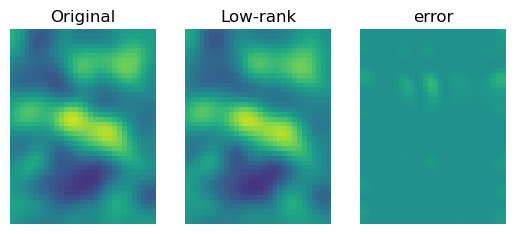

In [44]:
#erro map and percent difference from original matrix
errormap = (reconImag-A)**2

plt.subplot(131)
plt.imshow(A, vmin = -15, vmax = 15)
plt.axis('off')
plt.title('Original')


plt.subplot(132)
plt.imshow(reconImag, vmin = -15, vmax = 15)
plt.axis('off')
plt.title('Low-rank')



plt.subplot(133)
plt.imshow(errormap, vmin = -15, vmax = 15)
plt.axis("off")
plt.title("error")

plt.show()

In [49]:
# Convert singuar values to percent variance

# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

/var/folders/lv/t_x0qxn13y374h66r__crswh0000gn/T/ipykernel_6637/1800235369.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


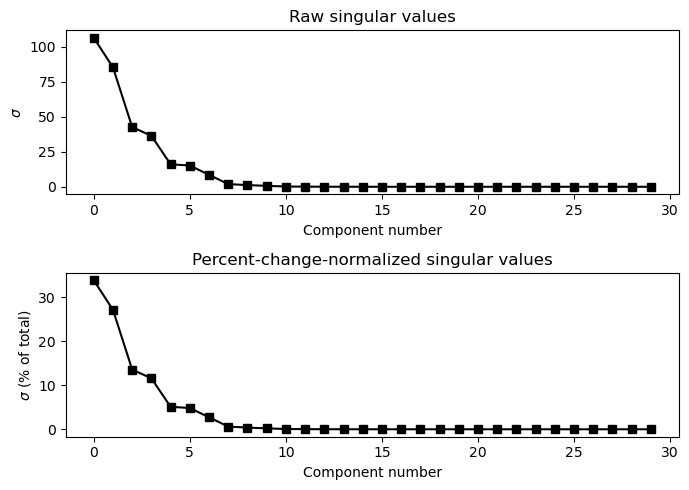

In [52]:
Ascaled = A*1

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()